# DATA CLEANING



First let's Import all the libraries we need to analyse this data.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Here we import
1. Pandas and Numpy for cleaning data , finding null value , treating missing and incorrect data.
2. Matplotlib and Seaborn to represent our findings through bar graph , line daigram and visualizations.


Now we upload our CSV file.
We can do this with a function that comes with Pandas Library called 'READ_CSV'.

In [75]:
sales = pd.read_csv('/content/AusApparalSales4thQrt2020.csv')

In [76]:
#to view the data just use head() function

sales.head(5)

,Date,Time,State,Group,Unit,Sales
0,1-Oct-20,Morning,WA,Kids,8,20000
1,1-Oct-20,Morning,WA,Men,8,20000
2,1-Oct-20,Morning,WA,Women,4,10000
3,1-Oct-20,Morning,WA,Seniors,15,37500
4,1-Oct-20,Afternoon,WA,Kids,3,7500


In [77]:
# for finding number of rows and columns use shape()

sales.shape

(7560, 6)

The data have 7560 Rows and 6 columns.....

In [78]:
#to get general information of the data i used info()

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


We can see there are 4 columns of 'Object' type and 2 columns with 'Integer' type.

In [79]:
pd.isnull(sales).sum()

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


Here I have used Panda's Isnull() function with sum() function to find rows with null value. As it shows '0' in each section that means this data have no empty rows aur columns.




In [80]:
# names of the columns
sales.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

# Analysis

Now we do some basic analysis and find mean , median , min and max etc.

In [81]:
sales.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [82]:
# using groupby() and sales according to
sales.groupby(['Group'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)

,Group,Sales
1,Men,85750000
3,Women,85442500
0,Kids,85072500
2,Seniors,84037500


Here we can notice the Men group have more sales , Women group are coming in second place and Kids group are coming after that.

In [83]:
sales.groupby(['State'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)

,State,Sales
5,VIC,105565000
0,NSW,74970000
3,SA,58857500
2,QLD,33417500
4,TAS,22760000
1,NT,22580000
6,WA,22152500


This data shows VIC have the highest sales and NSW and SA are coming after him.

In [84]:
sales.groupby(['Time'], as_index=False)['Sales'].sum().sort_values(by='Sales' , ascending=False)

,Time,Sales
2,Morning,114207500
0,Afternoon,114007500
1,Evening,112087500


We can see our most of the sales comes during Morning time but tere are not much difference in sales of Afternoon and Morning.

**On the basis of all the finding we can say that Mens Group purchase more units , State VIC have highest sales among all states , Morning time is prefered by the buyers and**


In [85]:
from datetime import datetime

In [86]:
sales["Date"] = pd.to_datetime(sales["Date"])

<ipython-input-86-e27f06085fd4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales["Date"] = pd.to_datetime(sales["Date"])


In [87]:
sales.set_index('Date' , inplace = True)

In [88]:
weekly_sales = sales.Sales.resample('W').sum()
weekly_sales

,Sales
Date,
2020-10-04,15045000
2020-10-11,27002500
2020-10-18,26640000
2020-10-25,26815000
2020-11-01,21807500
2020-11-08,20865000
2020-11-15,21172500
2020-11-22,21112500
2020-11-29,21477500


We can use resample() function to see what are the sales in every week.

In [89]:
monthly_sales = sales.Sales.resample('M').sum()
monthly_sales

,Sales
Date,
2020-10-31,114290000
2020-11-30,90682500
2020-12-31,135330000


Here we are using resample() for finding monthly_sales.

In [90]:
quaterly_sales = sales.Sales.resample('Q').sum()
quaterly_sales

,Sales
Date,
2020-12-31,340302500


Here we are using resample() for finding quaterly_sales

# Visualizations

<Axes: xlabel='State', ylabel='Sales'>

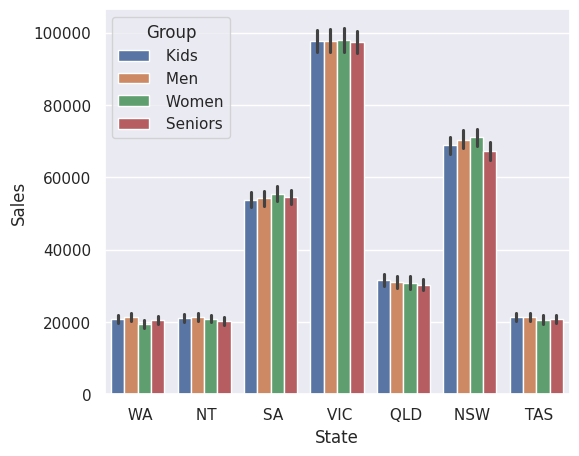

In [91]:
sns.barplot(x="State", y="Sales",hue = 'Group' , data=sales)

This is the visual representation of sales done in every **state** according to **groups**. In this we can clearly see that VIC state has done highest sales in this also Women Group has done more sales. (I am using BAR Graph because it is the best suitable graph for represeting groupwise sales and it is easy to under stand .)

<Axes: xlabel='Time', ylabel='Sales'>

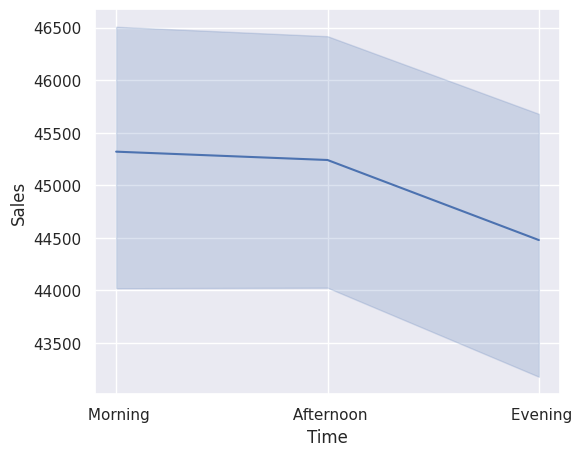

In [92]:
sns.lineplot(x="Time", y="Sales" , data=sales)

Here we see our peek sales happens in morning and decilne in evening.

In [93]:
monthly_unit1 = sales.Unit.resample('M').sum()
monthly_unit1 = pd.DataFrame(monthly_unit1)
monthly_unit1.insert(0, "Month", ['October','November','December'], True)

In [94]:
monthly_unit1

,Month,Unit
Date,,
2020-10-31,October,45716
2020-11-30,November,36273
2020-12-31,December,54132


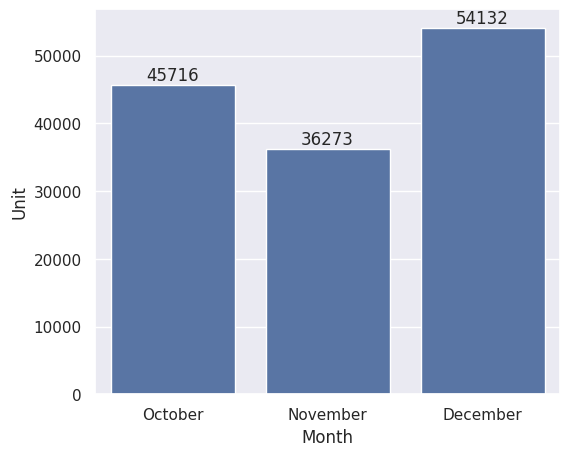

In [95]:
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.barplot(data = monthly_unit1, x = 'Month',y= 'Unit')

for bars in ax.containers:
    ax.bar_label(bars)

Here we are seeing the visula representation of monthly sales. And we find that december is leading the way with the highest sales.
I am using Unit instead of Sales because the price of the every unit is constant 2500 that's why we can use Unit or Sales any of this.
(Using the bar graph because it easy to understand and clearly shows the difference )  

In [96]:
weekly_unit = sales.Unit.resample('W').sum()
weekly_unit = pd.DataFrame(weekly_unit)
weekly_unit = weekly_unit.sort_values(by=['Unit'] , ascending=False)
weekly_unit = weekly_unit.head(10)


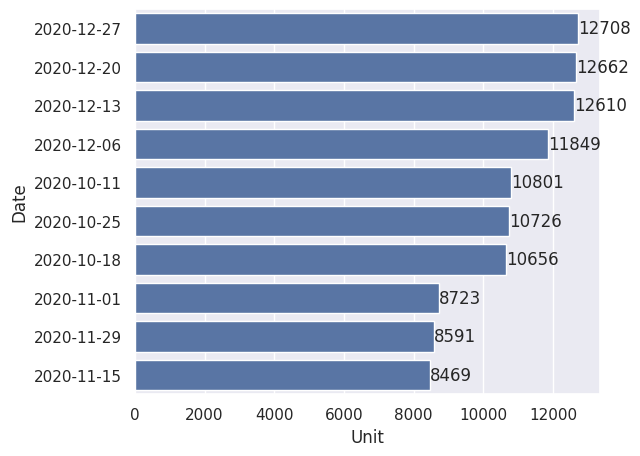

In [97]:
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.barplot(data = weekly_unit, x = 'Unit',y= 'Date')

for bars in ax.containers:
    ax.bar_label(bars)

In  Weekly data also we can see that weeks with the highest sales are from month of December and in monthly data December month have the highest sales that's  why we can say that december is the month with highest sales.


# Conclusion

With all  the anaylsis we have done, here are the 3 things we have found:


1.   In Groups Men Groups  Have Highest Sales. But the difference in sales of other groups are not much, so we can say every groups are purchasing our product.
2.   In State VIC state have Highest Sales.But here other State are far behind so we need  to improve our sales in other state also.
3.   Most  People are choosing Morning time for purchasing and less people at night.
